# Submission
* Lab: 01
* Topic: Decision Trees

* **Name**: Taimoor Arshad
* **CMS**: 294035
* **Class**: BESE-10B

#Importing libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


##Making model

**Importing Data and splitting** 

In [89]:
df = pd.read_csv('/content/14_monks-problems-1.csv', ";")
#Splitting on the basis of ";"

# Assigining values to input and output labels 
X = df.drop(columns = 'label')
y = df['label']
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


**For loop to iterate over multiple depths for the tree and declaring required arrays**

In [ ]:
# Declaring arrays to store important info
accuracy = []
depths = []
test_error = []
train_error = []
for depth in range(1, 18):
  decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0 ,max_depth=depth)
  decision_tree = decision_tree.fit(X_train, y_train)
  # Predicting values to obtain accuracy
  y_preds = decision_tree.predict(X_test)
  score = accuracy_score(y_test, y_preds)
  depths.append(depth)
  accuracy.append(score)
  # Calculating and appending errors for each iteration
  test_error.append(1 - decision_tree.score(X_test, y_test))
  train_error.append(1 - decision_tree.score(X_train, y_train))
  print('For depth of {0} nodes the accuracy we got was {1}\n'.format(depth, score*100))


Screenshot for checking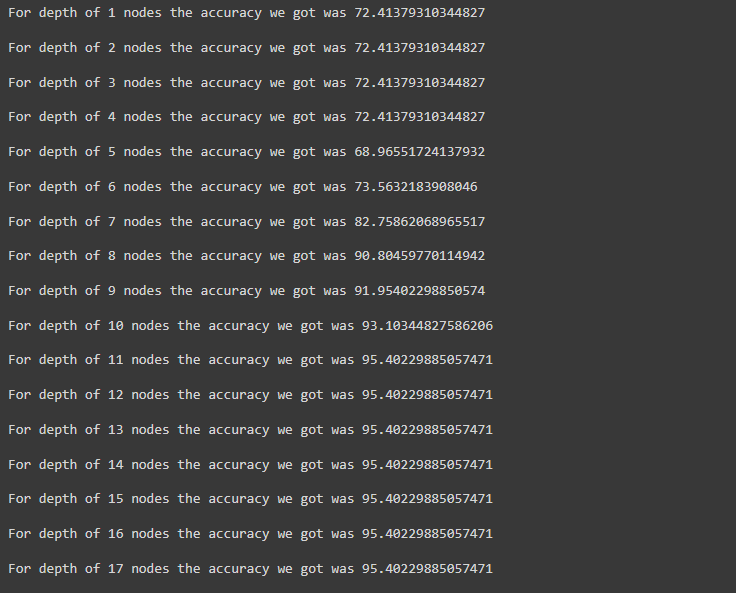

### Using depth with best accuracy

**As we can see that depth with 11 nodes gives us best accuracy we use that**

# Plotting

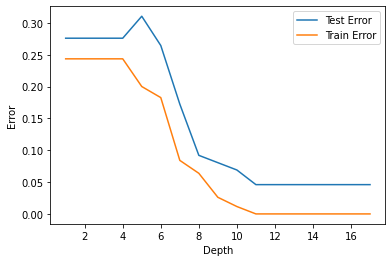

In [98]:
# Plotting the graph
plt.xlabel("Depth")
plt.ylabel("Error")
# Test and train errors are plotted
plt.plot(depths, test_error, label="Test Error")
plt.plot(depths, train_error, label = "Train Error")
plt.legend()

Screenshot for checking
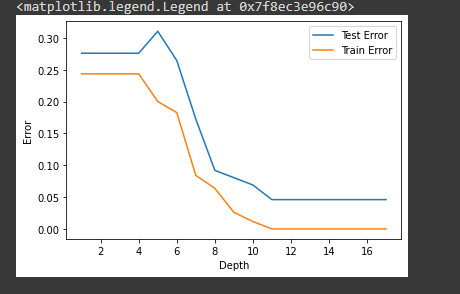

# Plotting the tree

Depth  = 11

In [ ]:
# Decision tree fitted for depth  = 11
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0 ,max_depth=11)
decision_tree.fit(X_test, y_test)


dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"25,8!"')
tree = graphviz.Source(pydot_graph.to_string())

# printing tree
tree

Screenshot for checking
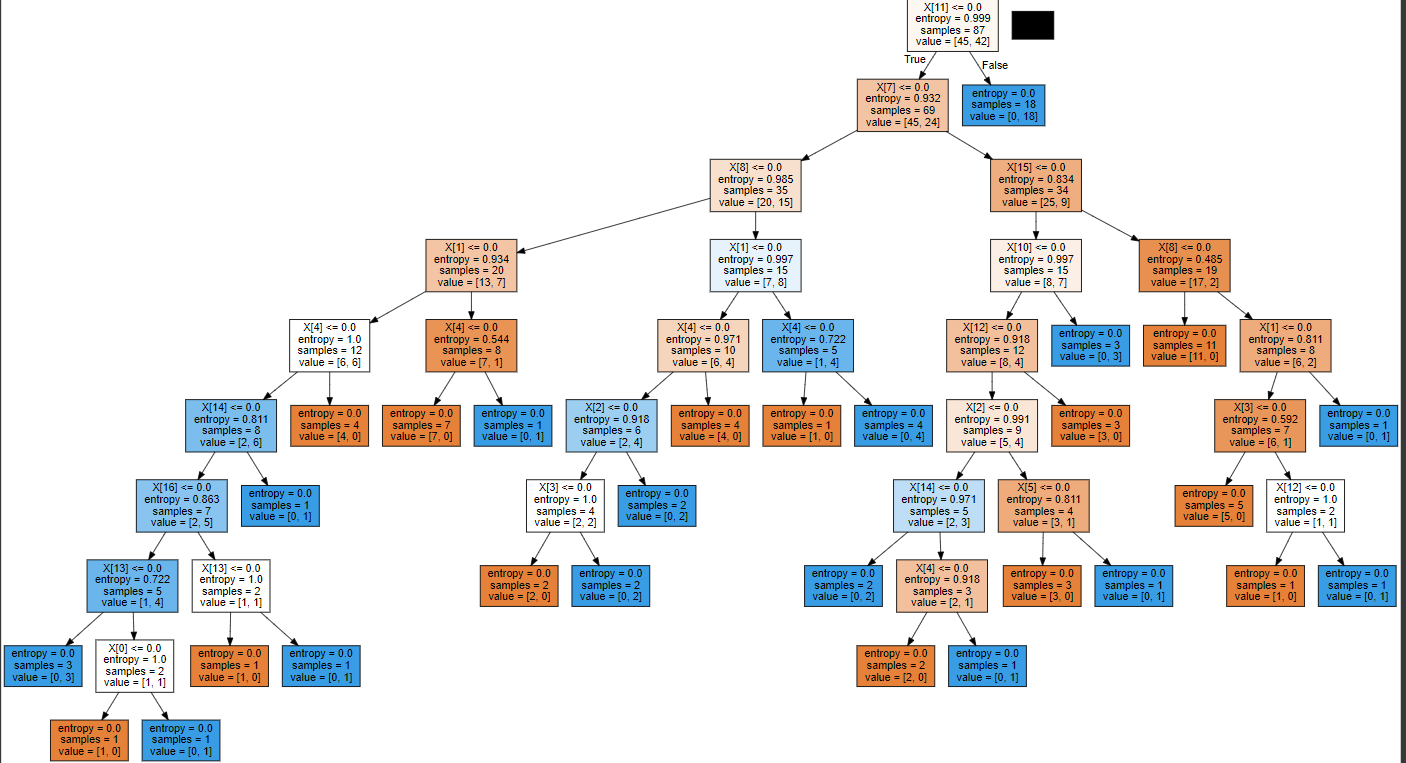